In [1]:
# %pylab inline
import json
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
import sklearn
import pandas as pd
from typing import Tuple
from typing import List
from matplotlib import pyplot as plt
%matplotlib inline  
import seaborn as sns   #probs need to pip install seaborn
import xgboost
import numpy as np
import pickle
import random
from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.cross_validation import KFold

#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams

import plotly as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

/Users/carinasauter/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/carinasauter/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
inputfile = 'convertedDataBlinking.csv'
dataset = pd.read_csv(inputfile)
# convert to arrays from strings

#stratifying sample 
thought = dataset[dataset['labels'] == 1]
print(len(thought))
notthought = dataset[dataset['labels'] == 0]
notthought.reset_index(drop=True)
notthoughtsample = notthought.sample(len(thought), replace=False, weights=None)
stratified_df = thought.append(notthoughtsample, ignore_index = True, verify_integrity=True)
dataset = stratified_df

 # shuffling it
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset.waves = dataset.waves.map(json.loads)
print(len(dataset))

90
180


In [3]:
inputtestfile = 'convertedDataBlinkingTest.csv'
datasetTest = pd.read_csv(inputtestfile)

#stratifying sampleTest 
thought = datasetTest[datasetTest['labels'] == 1]
notthought = datasetTest[datasetTest['labels'] == 0]
notthought.reset_index(drop=True)
notthoughtsample = notthought.sample(len(thought), replace=False, weights=None)
stratified_df = thought.append(notthoughtsample, ignore_index = True, verify_integrity=True)
datasetTest = stratified_df

 # shuffling it
datasetTest = datasetTest.sample(frac=1).reset_index(drop=True)


datasetTest.waves = datasetTest.waves.map(json.loads)

In [4]:
print(len(dataset))
print(len(datasetTest))

180
180


In [5]:
np.unique(dataset.waves[0])[:10] #for model maybe try to exclude outliers. 

array([-14976,   -225,   -218,   -204,   -201,   -196,   -194,   -193,
         -182,   -181])

In [6]:
waves = dataset.waves.tolist()
newList = []
for entry in waves:
    result = np.array(entry)
    newList.append(result)

In [7]:
wavesTest = datasetTest.waves.tolist()
newListTest = []
for entry in wavesTest:
    result = np.array(entry)
    newListTest.append(result)

In [8]:
X_train = np.array(newList)
Y_train = np.array(dataset['labels'])

In [9]:
X_test = np.array(newListTest)
Y_test = np.array(datasetTest['labels'])

In [10]:
# np.unique(Y_train)

In [11]:
assert X_train.shape[0] == Y_train.shape[0]

X_train.shape, Y_train.shape # just a check that everything has the right size

((180, 512), (180,))

In [12]:
assert X_test.shape[0] == Y_test.shape[0]
X_test.shape, Y_test.shape # just a check that everything has the right size

((180, 512), (180,))

In [13]:
X_test

array([[13104,  1381,  1321, ...,  -163,  -213,  -205],
       [  112,    80,    38, ...,    40,    54,    64],
       [14602,   -23,   -36, ...,    80,    96,   122],
       ..., 
       [   17,    17,    17, ...,     8,    17,  2583],
       [   32,    16,  2578, ...,    55,    59,    57],
       [   99,    28,   -29, ...,  -233,  -225,     0]])

In [14]:
X_test

array([[13104,  1381,  1321, ...,  -163,  -213,  -205],
       [  112,    80,    38, ...,    40,    54,    64],
       [14602,   -23,   -36, ...,    80,    96,   122],
       ..., 
       [   17,    17,    17, ...,     8,    17,  2583],
       [   32,    16,  2578, ...,    55,    59,    57],
       [   99,    28,   -29, ...,  -233,  -225,     0]])

In [18]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)


0.75555555555555554

In [19]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

acc_dict = {}

/Users/carinasauter/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning:

Variables are collinear.

/Users/carinasauter/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning:

Variables are collinear



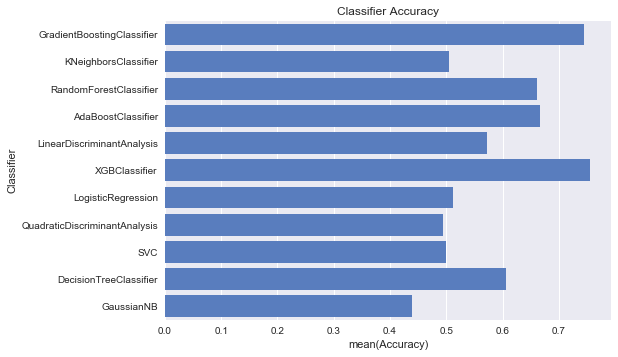

In [20]:
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, Y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf]
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [21]:
# rfc_classifier = RandomForestClassifier(random_state = 27)
# rfc_classifier.fit(X_train, Y_train)
# result = rfc_classifier.score(X_test, Y_test)
# result

In [22]:
# model = GaussianNB()
# model.fit(X_train, Y_train)
# result = rfc_classifier.score(X_test, Y_test)
# result

In [23]:
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(Y_test, model.predict(X_test)).ravel()

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[77 13]
 [31 59]]


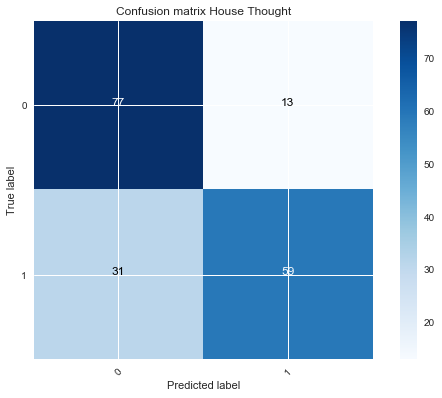

In [25]:
cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))
np.set_printoptions(precision=2)
import itertools

# Plot non-normalized confusion matrix
plt.figure()
class_names = np.unique(Y_test)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix House Thought')

In [294]:
def modelfit(alg, X_train, Y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label= Y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : " + str(metrics.accuracy_score(Y_train, dtrain_predictions)))
    print ("AUC Score (Train): " + str(metrics.roc_auc_score(Y_train, dtrain_predprob)))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [295]:
rfc1 = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_split=None, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=1, 
    random_state=27, 
    verbose=0, 
    warm_start=False, 
    class_weight=None)

In [298]:
rfc_classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [200]:
param_test1 = {
    'max_depth':[4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7],
    'min_samples_split': [2,3],
    'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3],
    'n_estimators':[8,10,12],
    'criterion': ['gini', 'entropy'],
    'random_state': [27],
    'min_impurity_split'
}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [155]:
param_test2 = {
 'min_impurity_split':[1,3,5,7],
 'min_samples_leaf':[1,3,5,7]
}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 1, 'min_samples_leaf': 1},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 1, 'min_samples_leaf': 3},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 1, 'min_samples_leaf': 5},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 1, 'min_samples_leaf': 7},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 3, 'min_samples_leaf': 1},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 3, 'min_samples_leaf': 3},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 3, 'min_samples_leaf': 5},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 3, 'min_samples_leaf': 7},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 5, 'min_samples_leaf': 1},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 5, 'min_samples_leaf': 3},
  mean: 0.50000, std: 0.00000, params: {'min_impurity_split': 5, 'min_samples_leaf': 5},
  mean: 0.50000, std:

In [159]:
param_test3 = {
    'min_weight_fraction_leaf':[0,0.1,0.2],
    'n_estimators':[7,8,9],
    
}

gsearch3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.51190, std: 0.04188, params: {'n_estimators': 7, 'min_weight_fraction_leaf': 0},
  mean: 0.54520, std: 0.02978, params: {'n_estimators': 8, 'min_weight_fraction_leaf': 0},
  mean: 0.54067, std: 0.06182, params: {'n_estimators': 9, 'min_weight_fraction_leaf': 0},
  mean: 0.51667, std: 0.04525, params: {'n_estimators': 7, 'min_weight_fraction_leaf': 0.1},
  mean: 0.52819, std: 0.04267, params: {'n_estimators': 8, 'min_weight_fraction_leaf': 0.1},
  mean: 0.54438, std: 0.04867, params: {'n_estimators': 9, 'min_weight_fraction_leaf': 0.1},
  mean: 0.52339, std: 0.06319, params: {'n_estimators': 7, 'min_weight_fraction_leaf': 0.2},
  mean: 0.49914, std: 0.03948, params: {'n_estimators': 8, 'min_weight_fraction_leaf': 0.2},
  mean: 0.53567, std: 0.03490, params: {'n_estimators': 9, 'min_weight_fraction_leaf': 0.2}],
 {'min_weight_fraction_leaf': 0, 'n_estimators': 8},
 0.54519890260631)

In [303]:
rfc2 = RandomForestClassifier(
    n_estimators=8, 
    criterion='gini', 
    max_depth=4, 
    min_samples_split=2, 
    min_samples_leaf=4, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_split=1e-07, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=1, 
    random_state=27, 
    verbose=0, 
    warm_start=False, 
    class_weight=None)

In [304]:
rfc_classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [308]:
rfc2.fit(X_train, Y_train)
result = rfc2.score(X_test, Y_test)
result

0.44666666666666666

In [224]:
print(rfc_classifier.predict(X_test))

[0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 0 0 1 

In [230]:
rfc_classifier.score(X_test,Y_test)

0.60333333333333339

In [28]:
# save the model to disk
filename = 'mindreadingmodel.sav'
pickle.dump(model, open(filename, 'wb'))